In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# input data

In [2]:
df=pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head().T

0        1       2       3        4
fixed acidity          7.4000   7.8000   7.800  11.200   7.4000
volatile acidity       0.7000   0.8800   0.760   0.280   0.7000
citric acid            0.0000   0.0000   0.040   0.560   0.0000
residual sugar         1.9000   2.6000   2.300   1.900   1.9000
chlorides              0.0760   0.0980   0.092   0.075   0.0760
free sulfur dioxide   11.0000  25.0000  15.000  17.000  11.0000
total sulfur dioxide  34.0000  67.0000  54.000  60.000  34.0000
density                0.9978   0.9968   0.997   0.998   0.9978
pH                     3.5100   3.2000   3.260   3.160   3.5100
sulphates              0.5600   0.6800   0.650   0.580   0.5600
alcohol                9.4000   9.8000   9.800   9.800   9.4000
quality                5.0000   5.0000   5.000   6.000   5.0000

In [3]:
df.shape

(1599, 12)

# Explore dataset

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

<Figure size 432x288 with 0 Axes>

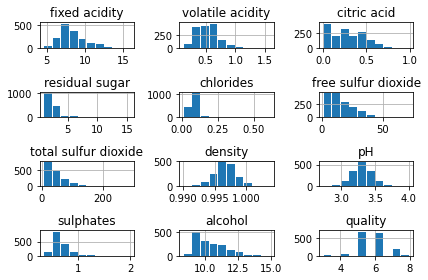

In [5]:
plt.figure()
df.hist(rwidth=0.9)
plt.tight_layout()

<AxesSubplot:xlabel='quality', ylabel='count'>

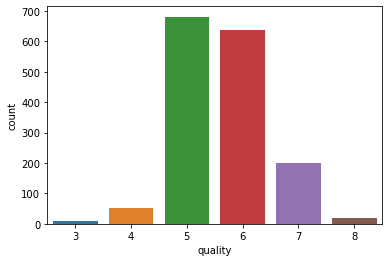

In [6]:
sns.countplot(x=df['quality'])

# setting threshold for quality

good= >6
bad= <6

<AxesSubplot:xlabel='quality', ylabel='count'>

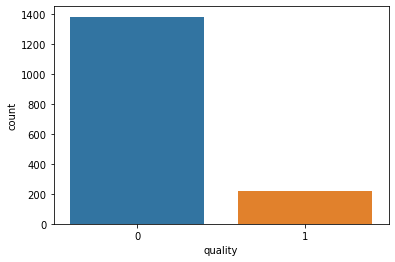

In [7]:
df['quality'] = [1 if i > 6 else 0 for i in df['quality']]
sns.countplot(x=df['quality'])

In [8]:
from pandas.plotting import scatter_matrix
attr=list(df.columns)

In [9]:
scatter_matrix(df[attr],figsize=(200,150))
plt.tight_layout()

In [10]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.120061         -0.270712     0.214716   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.047779  -0.097308            -0.071747   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.139517 -0.150460 -0.057283   0.199485   

                       alcohol   quality  
fixed acidity        -0.061668  0.120061  
volatile acidity     -0.202288 -0.270712  
citric acid           0.109903  0.214716  
residual sugar        0.042075  0.047779  
chlorides            -0.221141 -0.097308  
free sulfur dioxide  -0.069408 -0.071747  
total sulfur dioxide -0.205654 -0.139517  
density              -0.496180 -0.150460  
pH                    0.205633 -0.057283  
sulphates             0.093595  0.199485  
alcohol               1.000000  0.407315  
quality               0.407315  1.000000

In [11]:
#df=df.drop(['residual sugar','free sulfur dioxide','pH'],axis=1)

In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

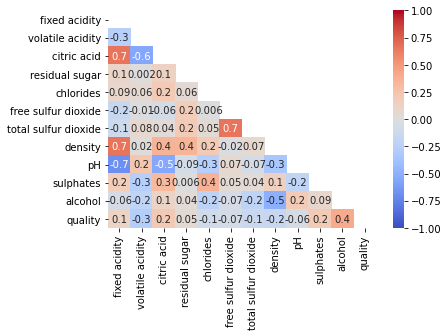

In [13]:
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, fmt='.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',mask=matrix)

# splitting dataset

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop(['quality'], axis=1)
y = df['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.20, random_state=42)

# feature scaling

Feature scaling is a method used to normalize the range of independent variables or features of data.

In [15]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

# KNN classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()


# Hyper parameter tuning

In [17]:
# For Hyper-parameter Tuning the model
from sklearn.model_selection import GridSearchCV

# For checking Model Performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

import warnings
warnings.simplefilter(action="ignore")

from sklearn.model_selection import StratifiedKFold

In [18]:

cv_method = StratifiedKFold(n_splits=3)
param={'n_neighbors':(1,3,5,7),'weights': ('uniform','distance'),'metric':('euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean','mahalanobis'),'p' :(1,2)}
clf = GridSearchCV(neigh, param,cv=cv_method,scoring="accuracy")
clf.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ('euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'wminkowski', 'seuclidean',
                                    'mahalanobis'),
                         'n_neighbors': (1, 3, 5, 7), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [19]:
clf.best_params_

{'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [20]:
knn = KNeighborsClassifier(n_neighbors= 5, p= 1, weights='distance',metric= 'euclidean')
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.90625

# cheking performance measures

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       273
           1       0.71      0.62      0.66        47

    accuracy                           0.91       320
   macro avg       0.82      0.79      0.80       320
weighted avg       0.90      0.91      0.90       320



[Text(0.5, 0, 'bad'), Text(1.5, 0, 'good')]

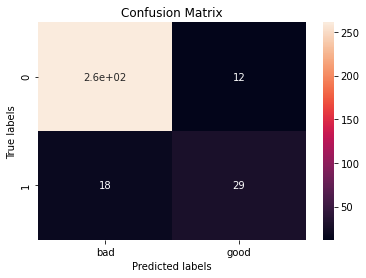

In [21]:
pred = knn.predict(X_test)
print("Classification Report")
print(classification_report(Y_test, pred))
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, pred), annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["bad", "good"])